In [1]:
%matplotlib inline


# Multi-dimensional scaling
###### Guberney Muñeton - Paula Andrea Pérez

In [4]:
"""Multidimensional scaling
    Read more in the :ref:`User Guide <multidimensional_scaling>`.
    Parameters
    ----------
    n_components : int, optional, default: 2
        Number of dimensions in which to immerse the dissimilarities.
    metric : boolean, optional, default: True
        If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.
    n_init : int, optional, default: 4
        Number of times the SMACOF algorithm will be run with different
        initializations. The final results will be the best output of the runs,
        determined by the run with the smallest final stress.
    max_iter : int, optional, default: 300
        Maximum number of iterations of the SMACOF algorithm for a single run.
    verbose : int, optional, default: 0
        Level of verbosity.
    eps : float, optional, default: 1e-3
        Relative tolerance with respect to stress at which to declare
        convergence.
    n_jobs : int or None, optional (default=None)
        The number of jobs to use for the computation. If multiple
        initializations are used (``n_init``), each run of the algorithm is
        computed in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    random_state : int, RandomState instance or None, optional, default: None
        The generator used to initialize the centers.  If int, random_state is
        the seed used by the random number generator; If RandomState instance,
        random_state is the random number generator; If None, the random number
        generator is the RandomState instance used by `np.random`.
    dissimilarity : 'euclidean' | 'precomputed', optional, default: 'euclidean'
        Dissimilarity measure to use:
        - 'euclidean':
            Pairwise Euclidean distances between points in the dataset.
        - 'precomputed':
            Pre-computed dissimilarities are passed directly to ``fit`` and
            ``fit_transform``.
    Attributes
    ----------
    embedding_ : array-like, shape (n_samples, n_components)
        Stores the position of the dataset in the embedding space.
    stress_ : float
        The final value of the stress (sum of squared distance of the
        disparities and the distances for all constrained points).
    
    --------------------------------SMACOF ALGORITHM------------------------
    
    Computes multidimensional scaling using the SMACOF algorithm.
    The SMACOF (Scaling by MAjorizing a COmplicated Function) algorithm is a
    multidimensional scaling algorithm which minimizes an objective function
    (the *stress*) using a majorization technique. Stress majorization, also
    known as the Guttman Transform, guarantees a monotone convergence of
    stress, and is more powerful than traditional techniques such as gradient
    descent.
    The SMACOF algorithm for metric MDS can summarized by the following steps:
    1. Set an initial start configuration, randomly or not.
    2. Compute the stress
    3. Compute the Guttman Transform
    4. Iterate 2 and 3 until convergence.
    The nonmetric algorithm adds a monotonic regression step before computing
    the stress.

        
        """




"Multidimensional scaling\n    Read more in the :ref:`User Guide <multidimensional_scaling>`.\n    Parameters\n    ----------\n    n_components : int, optional, default: 2\n        Number of dimensions in which to immerse the dissimilarities.\n    metric : boolean, optional, default: True\n        If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.\n    n_init : int, optional, default: 4\n        Number of times the SMACOF algorithm will be run with different\n        initializations. The final results will be the best output of the runs,\n        determined by the run with the smallest final stress.\n    max_iter : int, optional, default: 300\n        Maximum number of iterations of the SMACOF algorithm for a single run.\n    verbose : int, optional, default: 0\n        Level of verbosity.\n    eps : float, optional, default: 1e-3\n        Relative tolerance with respect to stress at which to declare\n        convergence.\n    n_jobs : int or None, optional (default=Non

In [5]:
%matplotlib inline
# Author: Paula Andrea Pérez <paulaperezt16@gmail.com>


print(__doc__)

import numpy as np

from matplotlib import pyplot as plt
import matplotlib 

from matplotlib.collections import LineCollection
import csv
import matplotlib.cm as cm

from sklearn.decomposition import PCA

from sklearn import manifold
from sklearn.metrics import euclidean_distances
import pandas as pd
seed = np.random.RandomState(seed=6)



# Add noise to the similarities
noise = np.random.rand(features.shape[0], features.shape[1])
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise




In [6]:
#Functions

def plottingCities(data, similarities, labels):
    fig = plt.figure(figsize=(20,10))

    ax = plt.axes([0., 0., 1., 1.])

    s = 100
    t = np.arange(len(pos))

    colors = cm.rainbow(np.linspace(0, 1, len(pos)))



    similarities = similarities.max() / similarities * 100
    similarities[np.isinf(similarities)] = 0

    # Plot the edges
    start_idx, end_idx = np.where(pos)
   

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    s=100

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(data[:, 0], data[:, 1],  marker = '*', s=s, c=colors, lw=10)

    matplotlib.rc('font', **font)

    p=0
    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label,
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = colors[p], alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize=20)
        p=p+1

    plt.subplots_adjust(bottom = 0.1)




    segments = [[data[i, :], data[j, :]]
                for i in range(len(data)) for j in range(len(pos))]
    values = np.abs(similarities)
    lc = LineCollection(segments,
                        zorder=0, cmap="rainbow",
                        norm=plt.Normalize(0, values.max()))
    lc.set_array(similarities.flatten())
    lc.set_linewidths(np.full(len(segments), 0.5))
    ax.add_collection(lc)
    plt.show()

    return



In [7]:

#Data Reading
#American Cities distance dataset

csvfile="AmericanCities.csv"
data = pd.read_csv(csvfile, sep=',')
ft=np.array(data)
features=[]
cities=[]
for i in range (ft.shape[0]):
    features1=[]
    for j in range (ft.shape[0]):
        features1.append(float(ft[i][1:ft.shape[1]][j]))
    features.append(features1)
    cities.append(ft[i][0])
features=np.vstack(features)
cities=np.hstack(cities)
data

,Cities,Atlanta,Chicago,Denver,Houston,Los Angeles,Miami,New York,San Francisco,Seattle,"Washington, DC"
0,Atlanta,0,587,1212,701,1936,604,748,2139,2182,543
1,Chicago,587,0,920,940,1745,1188,713,1858,1737,597
2,Denver,1212,920,0,879,831,1726,1631,949,1021,1494
3,Houston,701,940,879,0,1374,968,1420,1645,1891,1220
4,Los Angeles,1936,1745,831,1374,0,2339,2451,347,959,2300
5,Miami,604,1188,1726,968,2339,0,1092,2594,2734,923
6,New York,748,713,1631,1420,2451,1092,0,2571,2408,205
7,San Francisco,2139,1858,949,1645,347,2594,2571,0,678,2442
8,Seattle,2182,1737,1021,1891,959,2734,2408,678,0,2329
9,"Washington, DC",543,597,1494,1220,2300,923,205,2442,2329,0


In [8]:

# Center the data
features -= features.mean()
#Compute dissimilarities
similarities= euclidean_distances(features)


2274465.7974231467


/home/paula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


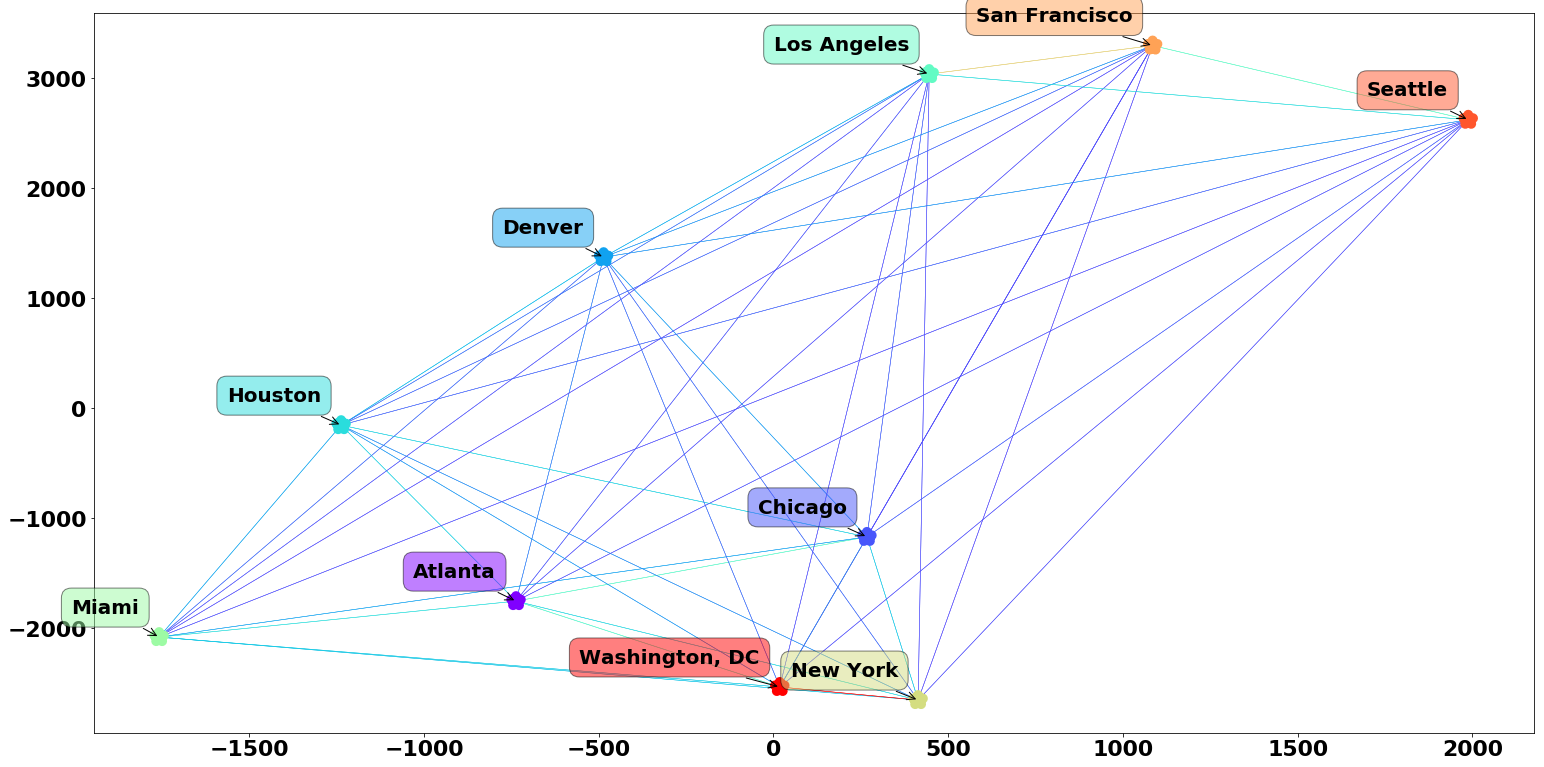

In [11]:

"""
# Add noise to the similarities
noise = np.random.rand(features.shape[0], features.shape[1])
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

"""

#Precomputed similarities
mds = manifold.MDS(n_components=2, max_iter=30000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)

pos = mds.fit(similarities).embedding_

stress = mds.fit(similarities).stress_

###########################################OTHER OPTIONS###########################################
#Euclidean distance                                                                               #
#                                                                                                 #
#mds = manifold.MDS(n_components=2,  random_state=seed,                                           #
#                  #dissimilarity="euclidean")                                                    #
#pos = mds.fit(features).embedding_                                                               #
#                                                                                                 #
#Non-metric MDS                                                                                   #
#                                                                                                 #
#nmds = manifold.MDS(n_components=2, metric=False, max_iter=30000, eps=1e-12,                     #
#                    #dissimilarity="precomputed", random_state=seed, n_jobs=1,                   #
#                    #n_init=1)                                                                   #
#npos = nmds.fit_transform(similarities, init=pos)                                                #
#                                                                                                 #
# Rescale the data                                                                                #
###########################################OTHER OPTIONS###########################################

pos *= np.sqrt((features ** 2).sum()) / np.sqrt((pos ** 2).sum())
#npos *= np.sqrt((features ** 2).sum()) / np.sqrt((npos ** 2).sum()) #Non-metric MDS

print(stress)
plottingCities(data=pos, similarities=similarities, labels=cities)


<img src="USAMAP.jpg">


/home/paula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


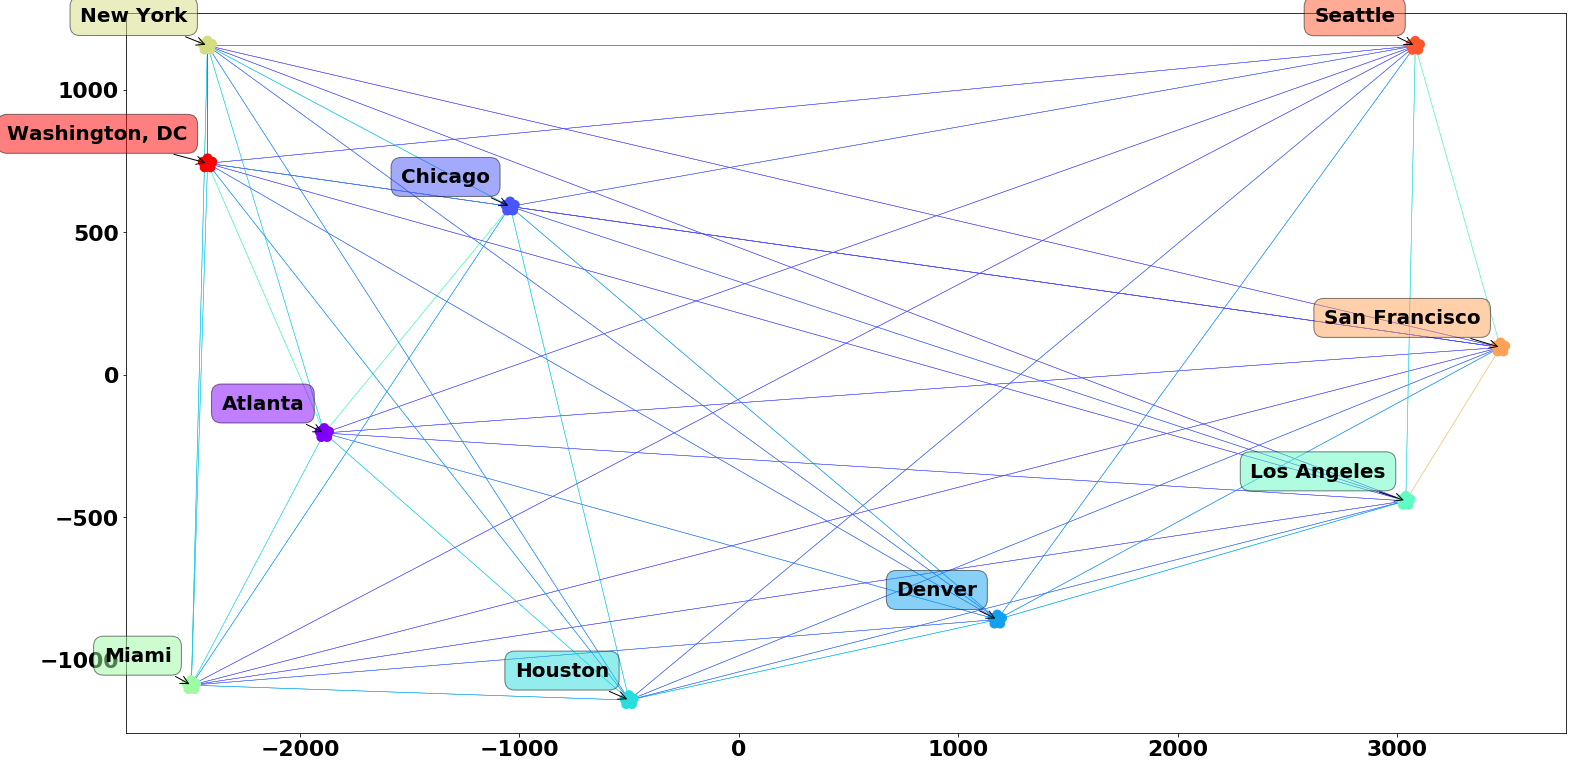

In [12]:
# Rotate the data

clf = PCA(n_components=2)
pos = clf.fit_transform(pos)


#npos = clf.fit_transform(npos)



plottingCities(data=pos, similarities=similarities, labels=cities)



<img src="USAMAP.jpg">
